# Anomaly detection

### Michał Spinczyk
Link do danych:
https://drive.google.com/file/d/13ijeMISDkQ2IU6-9sNedjgjI9HCctWh-/view

In [93]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   
print(X.shape)

(307, 2)


## Visualise the dataset

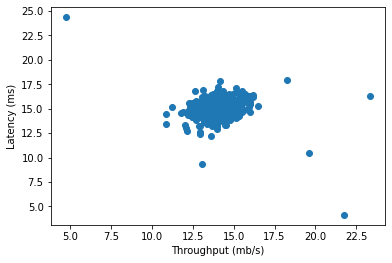

In [94]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Throughput (mb/s)")
plt.ylabel("Latency (ms)")
plt.show()

## Plot the histogram of the data

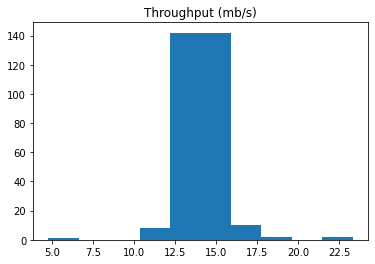

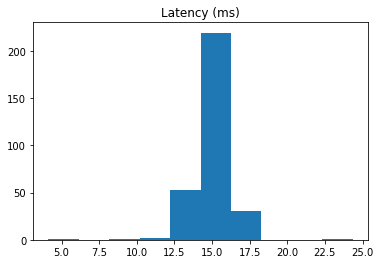

In [95]:
plt.figure()
plt.hist(X[:,0])
plt.plot()
plt.title("Throughput (mb/s)")
plt.show()

plt.figure()
plt.hist(X[:,1])
plt.title("Latency (ms)")
plt.plot()
plt.show()

## Gaussian distribution

In [96]:
def estimate_gaussian(X):  
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    return mu, sigma

mu, sigma = estimate_gaussian(X)
print(mu, sigma)

[14.11222578 14.99771051] [1.35374717 1.3075723 ]


## Calculate probability

In [97]:
Xval = data['Xval']  
yval = data['yval']

### Calculate the probability for X data

In [98]:
from scipy import stats
X_prob = stats.norm.pdf(X[:50,:],loc = mu,scale = sigma)
print(X_prob)

[[0.21620977 0.29928475]
 [0.25745208 0.19539236]
 [0.29413223 0.24631896]
 [0.24721192 0.20353285]
 [0.27251547 0.23369303]
 [0.2918119  0.14549894]
 [0.18713958 0.25600918]
 [0.15117648 0.24151341]
 [0.09356331 0.19949913]
 [0.166609   0.30423483]
 [0.29338708 0.09037578]
 [0.29448769 0.28766234]
 [0.25559237 0.27797121]
 [0.25595621 0.27173864]
 [0.2932714  0.12881868]
 [0.2944456  0.28087687]
 [0.29288017 0.29975441]
 [0.28518331 0.3046332 ]
 [0.27727759 0.24946431]
 [0.09489765 0.10258106]
 [0.27027271 0.28011206]
 [0.29342161 0.30119392]
 [0.24110555 0.15516046]
 [0.29304288 0.29735436]
 [0.19607729 0.21044271]
 [0.15652979 0.15894753]
 [0.27590459 0.28665754]
 [0.25749622 0.29485051]
 [0.27667047 0.2921371 ]
 [0.2834953  0.27033816]
 [0.17068283 0.29362853]
 [0.29318613 0.30032058]
 [0.20432637 0.30239897]
 [0.19577297 0.30455403]
 [0.10897052 0.19181707]
 [0.24595126 0.18619014]
 [0.14063746 0.25129732]
 [0.29463374 0.27874829]
 [0.28052751 0.25820116]
 [0.29371857 0.2893207 ]


In [99]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm.pdf(Xval[:,0],loc = mu[0],scale = sigma[0])
pval[:,1] = stats.norm.pdf(Xval[:,1],loc = mu[1],scale = sigma[1])

## Selecting the threshold

In [100]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval): 
  threshold = np.linspace(pval.min(),pval.max(),10000)
  best_eps = threshold[0]
  current_eps = best_eps
  pred = np.zeros((len(yval),1))

  for k in range(len(yval)):
      if pval[k,0] > current_eps or pval[k,1] > current_eps:
          pred[k] = 1

  best_f1 = f1_score(yval, pred)

  for i in range(len(threshold)):
      current_eps = threshold[i]
      pred = np.zeros((len(yval),1))

      for k in range(len(yval)):
          if pval[k,0] < current_eps or pval[k,1] < current_eps:
              pred[k] = 1

      current_f1 = f1_score(yval, pred)
      
      if current_f1 > best_f1:
          best_eps = current_eps
          best_f1 = current_f1

  return best_eps, best_f1

## Anomaly detection result

In [101]:
best_eps, best_f1 = select_threshold(pval,yval)
print(best_eps, best_f1)

pred = np.zeros((len(yval),1))
for k in range(len(yval)):
    if pval[k,0] < best_eps or pval[k,1] < best_eps:
        pred[k] = 1

0.0003966715195093453 0.8750000000000001


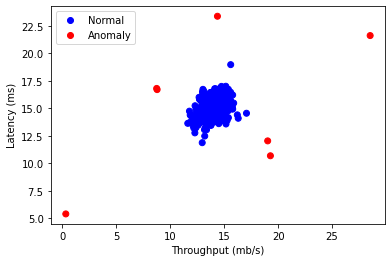

In [102]:
plt.figure()
scatter = plt.scatter(Xval[:,0],Xval[:,1], c = pred, cmap = "bwr")
plt.xlabel("Throughput (mb/s)")
plt.ylabel("Latency (ms)")
plt.legend(handles=scatter.legend_elements()[0], labels = ['Normal', 'Anomaly'])
plt.show()